In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# constants
T=1
n = 10
del_T = T/(2**n)
copy = 1000

Mean of W_T for n = 10: 0.035793042272910885
Variance of W_T for n = 10: 1.0835872036999186
The covariance of W_T and W_T/2 for n = 10: 0.5473501540512868
Mean of W_T for n = 11: -0.03784246592892708
Variance of W_T for n = 11: 0.9503812951633699
The covariance of W_T and W_T/2 for n = 11: 0.4934621127780586
Mean of W_T for n = 12: 0.020023654072109716
Variance of W_T for n = 12: 0.9393562451241826
The covariance of W_T and W_T/2 for n = 12: 0.4726500547617026
Mean of W_T for n = 13: 0.026235449768081884
Variance of W_T for n = 13: 0.9842268610396545
The covariance of W_T and W_T/2 for n = 13: 0.5004768863679532
Mean of W_T for n = 14: -0.030706335095434464
Variance of W_T for n = 14: 0.9988717847667208
The covariance of W_T and W_T/2 for n = 14: 0.4998688116956479
Mean of W_T for n = 15: -0.01997122874247173
Variance of W_T for n = 15: 0.9768153979797962
The covariance of W_T and W_T/2 for n = 15: 0.4931040587115414
Mean of W_T for n = 16: 0.03143434083612392
Variance of W_T for n = 1

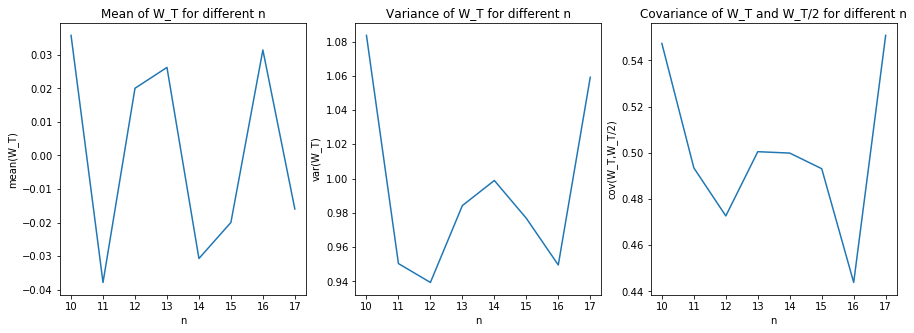

In [9]:
#Q1
def simu_forward(copy,n,T):
    del_T = T/(2**n)
    Z = np.random.randn(copy,2**n)
    W_Q1 = np.cumsum(np.sqrt(del_T)*Z, axis = 1)
    return np.concatenate((np.zeros((copy,1)),W_Q1),axis = 1)

def Q1(n, T, flag_print = True):
    W_Q1 = simu_forward(copy,n,T)
    mean_WT_Q1= np.mean(W_Q1[:,-1])
    var_WT_Q1 = np.var(W_Q1[:,-1])
    W_T_Q1 = W_Q1[:,-1]-mean_WT_Q1
    W_T2_Q1 = W_Q1[:,2**(n-1)] - np.mean(W_Q1[:,2**(n-1)])
    cov = 1./copy*np.sum(W_T_Q1*W_T2_Q1)
    if flag_print:
        print("Mean of W_T for n = {}: ".format(n)+ str(mean_WT_Q1))
        print("Variance of W_T for n = {}: ".format(n)+ str(var_WT_Q1))
        print("The covariance of W_T and W_T/2 for n = {}: ".format(n)+ str(cov))
        
    return mean_WT_Q1,var_WT_Q1,cov

nn = np.arange(10,18)
means = []
variances = []
covs = []
for i in nn:
    mean_i,var_i,cov_i = Q1(i,1)
    means.append(mean_i)
    variances.append(var_i)
    covs.append(cov_i)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(nn,means)
plt.title("Mean of W_T for different n")
plt.xlabel('n')
plt.ylabel('mean(W_T)')
plt.subplot(1,3,2)
plt.plot(nn,variances)
plt.title("Variance of W_T for different n")
plt.xlabel('n')
plt.ylabel('var(W_T)')
plt.subplot(1,3,3)
plt.plot(nn,covs)
plt.title("Covariance of W_T and W_T/2 for different n")
plt.xlabel('n')
plt.ylabel('cov(W_T,W_T/2)')
plt.show()


# Conclusion for Q1
The mean of W_T converges to 0. The variance of W_T converges to 1, and the covariance of W_T and W_T/2 converges to 0.5

Mean of W_T for n = 10: 0.012157316371091942
Variance of W_T for n = 10: 0.9620827074308104
The covariance of W_T and W_T/2 for n = 10: 0.4876346907440483
Mean of W_T for n = 11: -0.04221338352879633
Variance of W_T for n = 11: 1.0535845155739805
The covariance of W_T and W_T/2 for n = 11: 0.5472434278660958
Mean of W_T for n = 12: 0.00817217841670486
Variance of W_T for n = 12: 0.9410192541103861
The covariance of W_T and W_T/2 for n = 12: 0.4965419386757201
Mean of W_T for n = 13: -0.06745538278161713
Variance of W_T for n = 13: 0.9622331373249576
The covariance of W_T and W_T/2 for n = 13: 0.5052015575430648
Mean of W_T for n = 14: 0.019961915746906915
Variance of W_T for n = 14: 1.0087509520025675
The covariance of W_T and W_T/2 for n = 14: 0.48168939032577235
Mean of W_T for n = 15: 0.05354078709022
Variance of W_T for n = 15: 1.0471508611754414
The covariance of W_T and W_T/2 for n = 15: 0.5210646322136417
Mean of W_T for n = 16: -0.017520963319142113
Variance of W_T for n = 16: 

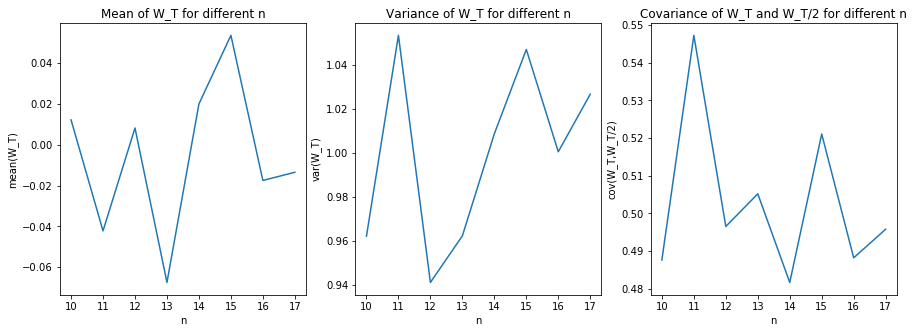

In [10]:
def simu_backward(copy,n,T):
    del_T = T/(2**n)
    W = np.zeros((copy, 1+2**n))
    W[:,-1] = T*np.random.randn(copy)
    for i in range(1,n+1):
        step = 2**(n-i)
        for j in range(2**(i-1)):
            index = step+2*j*step
            W[:,index] = np.random.normal((W[:,index+step]+W[:,index-step])/2, np.sqrt(T/(2**(i+1))))
    return W


def Q2(n, T, flag_print = True):
    W = simu_backward(copy,n,T)
    mean_WT= np.mean(W[:,-1])
    var_WT = np.var(W[:,-1])
    W_T = W[:,-1]-mean_WT
    W_T2 = W[:,2**(n-1)] - np.mean(W[:,2**(n-1)])
    cov = 1./copy*np.sum(W_T*W_T2)
    if flag_print:
        print("Mean of W_T: "+ str(mean_WT))
        print("Variance of W_T: "+ str(var_WT))
        print("The covariance of W_T and W_T/2: "+ str(cov))
    
    return mean_WT,var_WT,cov

nn = np.arange(10,18)
means = []
variances = []
covs = []
for i in nn:
    mean_i,var_i,cov_i = Q1(i,1)
    means.append(mean_i)
    variances.append(var_i)
    covs.append(cov_i)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(nn,means)
plt.title("Mean of W_T for different n")
plt.xlabel('n')
plt.ylabel('mean(W_T)')
plt.subplot(1,3,2)
plt.plot(nn,variances)
plt.title("Variance of W_T for different n")
plt.xlabel('n')
plt.ylabel('var(W_T)')
plt.subplot(1,3,3)
plt.plot(nn,covs)
plt.title("Covariance of W_T and W_T/2 for different n")
plt.xlabel('n')
plt.ylabel('cov(W_T,W_T/2)')
plt.show()

# Conclusion for Q2
The backward simulation has the same property as the forward simulation. The mean of W_T converges to 0. The variance of W_T converges to 1, and the covariance of W_T and W_T/2 converges to 0.5

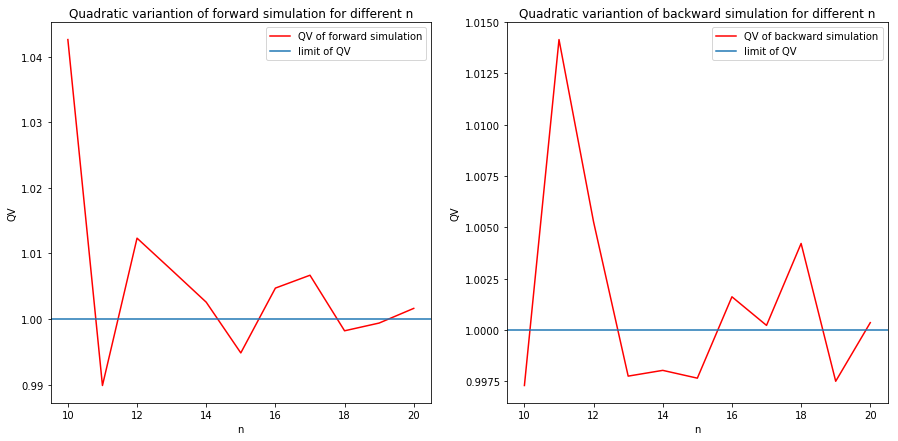

In [12]:
#Q3

nn = np.arange(10,21)
QV_forward = []
QV_backward = []
for i in nn:
    #print(i)
    W_f = simu_forward(1,i,T)
    QV_forward.append(np.sum((W_f[0,1:]-W_f[0,0:-1])*(W_f[0,1:]-W_f[0,0:-1])))
    W_b = simu_backward(1,i,T)
    QV_backward.append(np.sum((W_b[0,1:]-W_b[0,0:-1])*(W_b[0,1:]-W_b[0,0:-1])))
    
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(nn,QV_forward, 'r',label = 'QV of forward simulation')
plt.axhline(T, label = 'limit of QV')
plt.legend(loc = 'best')
plt.title('Quadratic variantion of forward simulation for different n')
plt.xlabel('n')
plt.ylabel('QV')
plt.subplot(1,2,2)
plt.plot(nn,QV_backward, 'r', label = 'QV of backward simulation')
plt.axhline(T,label = 'limit of QV')
plt.legend(loc = 'best')
plt.title('Quadratic variantion of backward simulation for different n')
plt.xlabel('n')
plt.ylabel('QV')
plt.show()

# Conclusion for Q3
The quadratic variations of forward simulation and backward simulation converge to the limit T as n grows